**Objective** : The objective of this project is to study employee performance across different departments, uncover the top factors affecting performance, and develop a machine learning model that can accurately predict employee performance for decision-making and talent optimization.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
employee_df = pd.read_excel("../../data/raw/INX_Future_Inc_Employee_Performance.xlsx")

employee_df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
employee_df.shape

(1200, 28)

In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [5]:
emp_cat_cols = employee_df.describe(include ='O').columns
emp_num_cols = employee_df.describe(exclude ='O').columns
print("cat_cols:", emp_cat_cols)
print("num_cols:", emp_num_cols)

cat_cols: Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')
num_cols: Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')


In [6]:
employee_df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [7]:
employee_df.duplicated().sum()

0

**Outlier Detection and Handling**

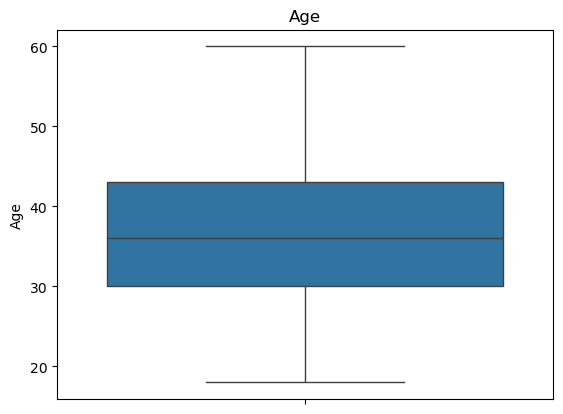

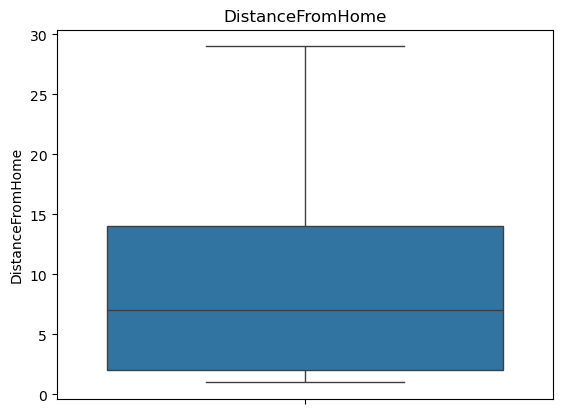

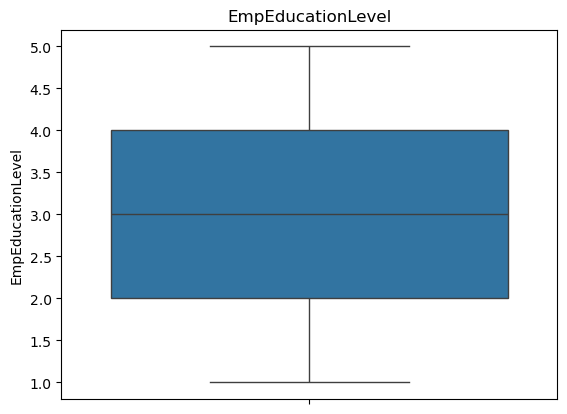

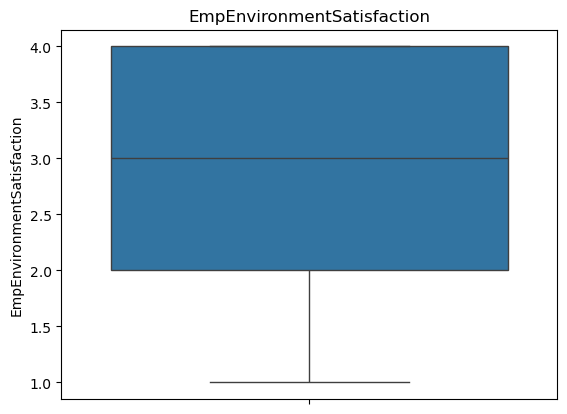

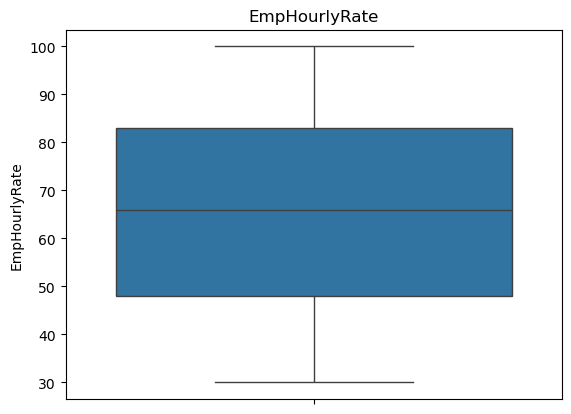

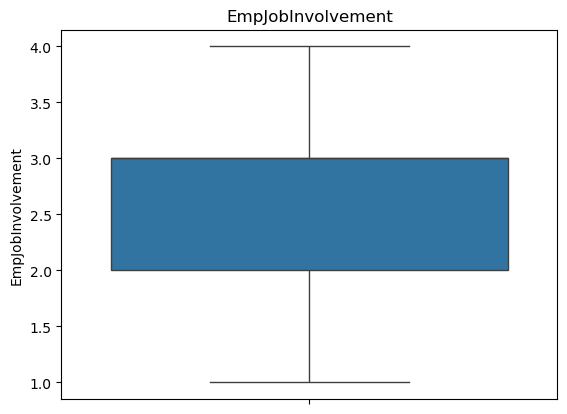

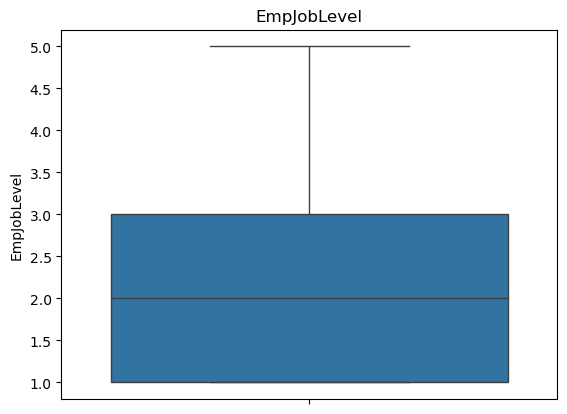

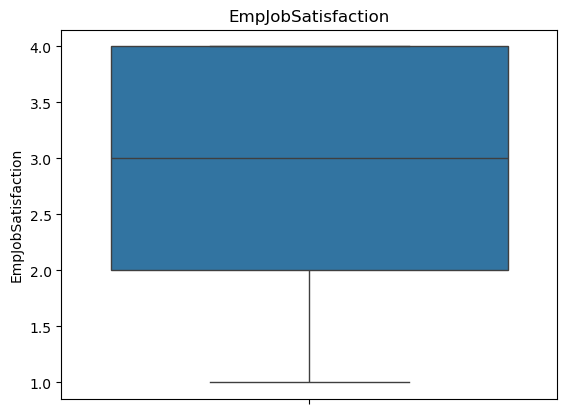

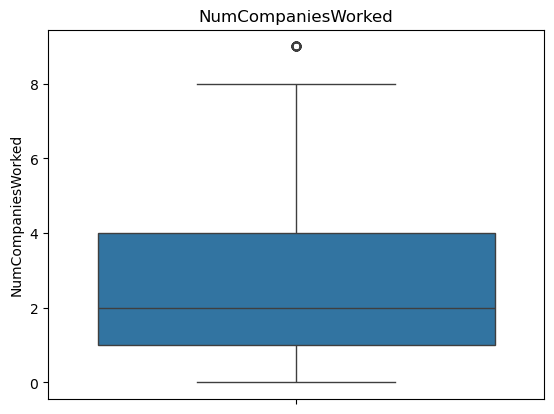

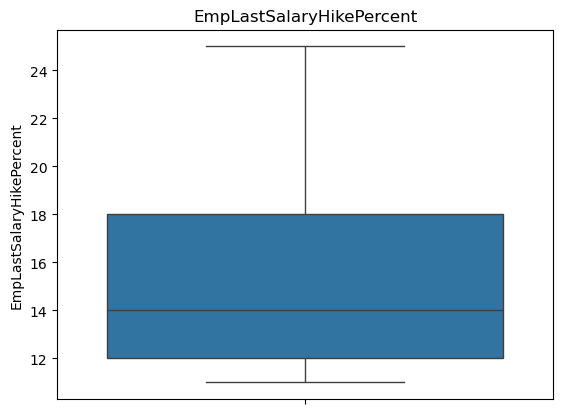

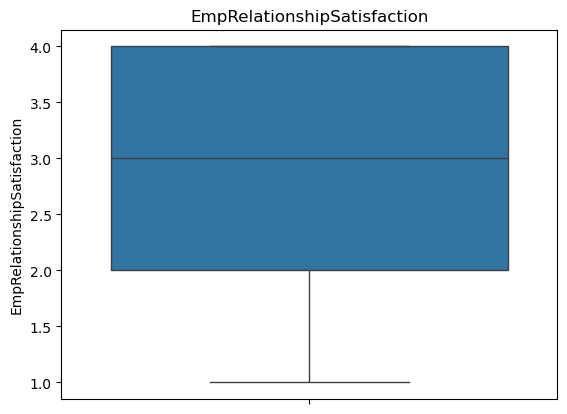

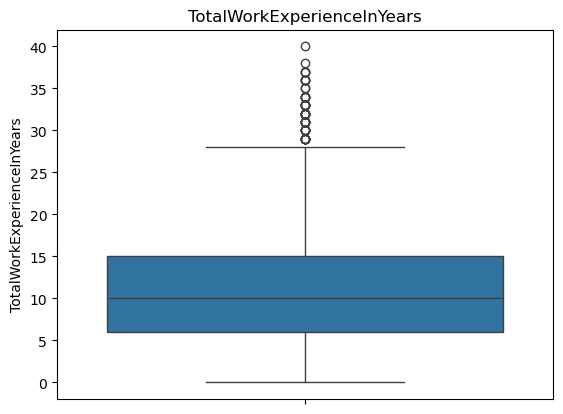

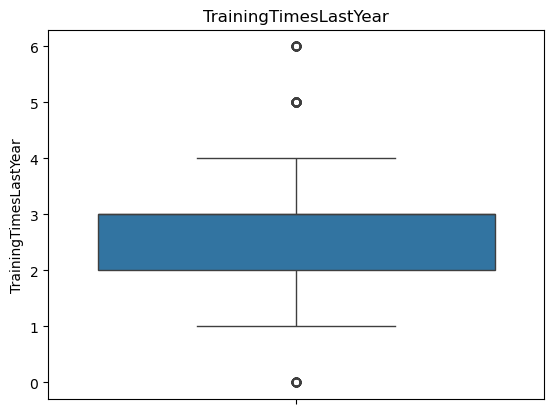

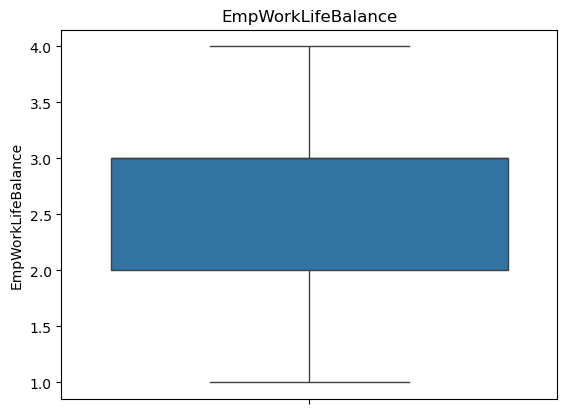

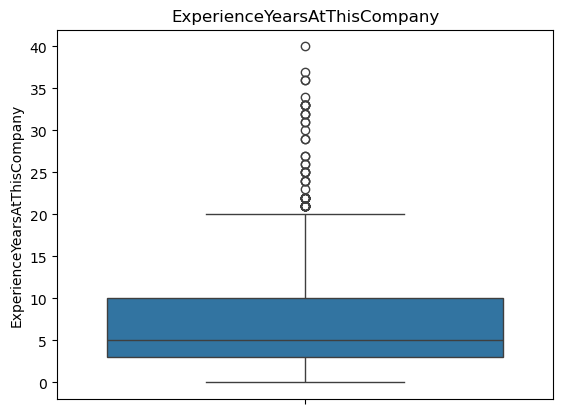

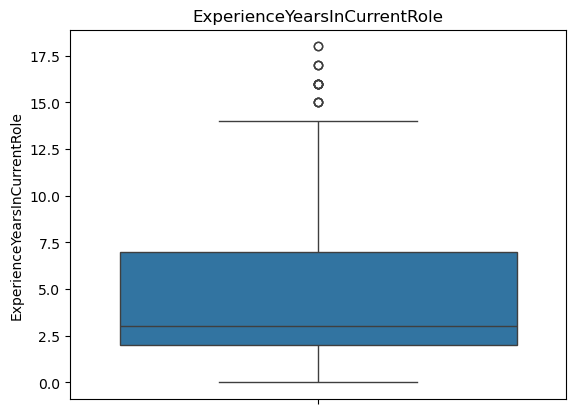

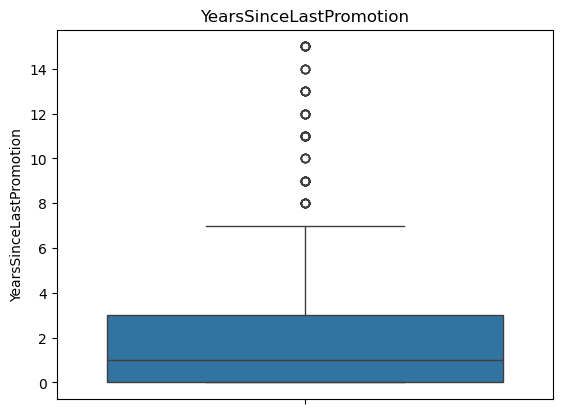

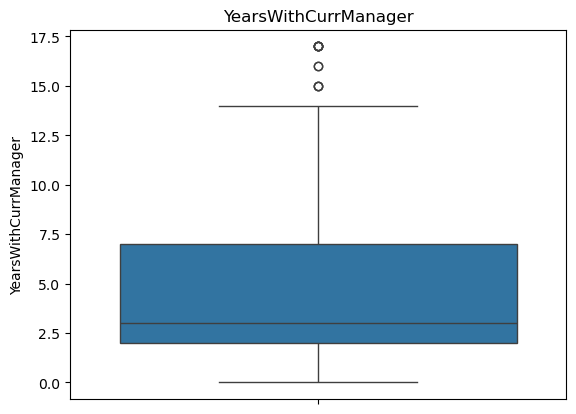

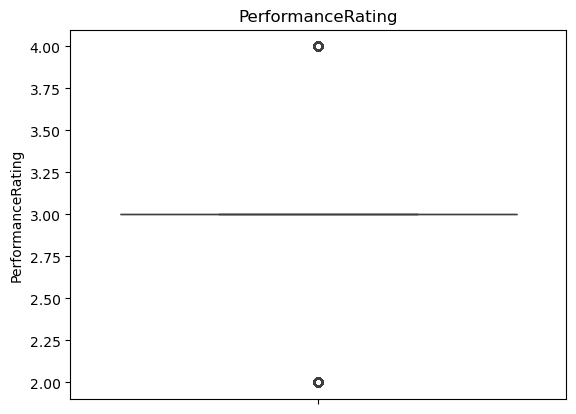

In [8]:
for col in emp_num_cols:
    sns.boxplot(employee_df[col])
    plt.title(col)
    plt.show()

- DistanceFromHome shows a few far-distance outliers around 20–30 km.
- NumCompaniesWorked has clear outliers where employees worked in 7+ companies.
- EmpLastSalaryHikePercent includes rare high hikes in the 22–25% range.
- TotalWorkExperienceInYears contains long-experience outliers above 30 years.
- ExperienceYearsAtThisCompany and ExperienceYearsInCurrentRole show tenure-based outliers, with values 30+ years and 15+ years respectively.
- YearsSinceLastPromotion has extreme values indicating 10–15 years without promotion.
- YearsWithCurrManager contains outliers above 12 years with the same manager.
- Age, EmpJobInvolvement, EmpEducationLevel, JobSatisfaction, and WorkLifeBalance show minimal or no outliers, indicating stable distributions.

In [9]:
outlier_cols = [
    'DistanceFromHome',
    'NumCompaniesWorked',
    'EmpLastSalaryHikePercent',
    'TotalWorkExperienceInYears',
    'ExperienceYearsAtThisCompany',
    'ExperienceYearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]
for col in outlier_cols:
    Q1 = employee_df[col].quantile(0.25)
    Q3 = employee_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    employee_df[col] = np.where(employee_df[col] < lower, lower,
                       np.where(employee_df[col] > upper, upper, employee_df[col]))


In [10]:
emp_cat_cols

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [11]:
employee_df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

**Encoding**
-Binary categorical features were encoded using Label Encoding, as these columns contain only two possible values and can be efficiently represented as 0/1.
-For multi-category features, One-Hot Encoding was applied to avoid introducing false ordinal relationships and to ensure that each category is treated independently during model training.

In [12]:
binary_cols = ['Gender', 'OverTime', 'Attrition']

multi_cat_cols = [
    'EducationBackground',
    'MaritalStatus',
    'EmpDepartment',
    'EmpJobRole',
    'BusinessTravelFrequency'
]

from sklearn.preprocessing import LabelEncoder

# Label encode binary columns
le = LabelEncoder()
for col in binary_cols:
    employee_df[col] = le.fit_transform(employee_df[col])

# One-Hot encode multi-category columns
employee_df = pd.get_dummies(employee_df, columns=multi_cat_cols, drop_first=True)

# Convert boolean dummies to 0/1
bool_cols = employee_df.select_dtypes(include='bool').columns
employee_df[bool_cols] = employee_df[bool_cols].astype(int)

In [13]:
employee_df.head()

,EmpNumber,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,E1001000,32,1,10.0,3,4,55,3,2,4,...,0,0,1,0,0,0,0,0,0,1
1,E1001006,47,1,14.0,4,4,42,3,2,1,...,0,0,1,0,0,0,0,0,0,1
2,E1001007,40,1,5.0,4,4,48,2,3,1,...,0,0,1,0,0,0,0,0,1,0
3,E1001009,41,1,10.0,4,2,73,2,5,4,...,0,0,0,0,0,0,0,0,0,1
4,E1001010,60,1,16.0,4,1,84,3,2,1,...,0,0,1,0,0,0,0,0,0,1


In [14]:
employee_df['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

**scaling**
Only the true numerical features (excluding binary 0/1 encoded columns like Gender, OverTime, and Attrition) were standardized using StandardScaler.
This ensures that all continuous variables are brought to a similar scale, improving the performance of distance-based models such as SVM, while preventing unnecessary scaling of binary categorical variables that already carry meaningful encoded values.

In [15]:
# Identify numeric columns
numeric_cols = employee_df.select_dtypes(include=['int64', 'float64']).columns

# Remove binary 0/1 columns so they don't get scaled
binary_cols = ['Gender', 'OverTime', 'Attrition']
target_col = 'PerformanceRating'
numeric_cols = [c for c in numeric_cols if c not in binary_cols and c != target_col]

# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
employee_df[numeric_cols] = scaler.fit_transform(employee_df[numeric_cols])


In [16]:
employee_df.head()

,EmpNumber,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,E1001000,-0.541458,1,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,...,0,0,1,0,0,0,0,0,0,1
1,E1001006,1.109888,1,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,...,0,0,1,0,0,0,0,0,0,1
2,E1001007,0.339260,1,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,...,0,0,1,0,0,0,0,0,1,0
3,E1001009,0.449349,1,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,...,0,0,0,0,0,0,0,0,0,1
4,E1001010,2.541054,1,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,...,0,0,1,0,0,0,0,0,0,1


In [17]:
import os

# Path where your processed file will be stored
file_path = "../../data/processed/processed_df.xlsx"

# If an old file exists at this path, remove it
if os.path.exists(file_path):
    os.remove(file_path)
    print("Old processed file removed.")

# Save the new processed data
employee_df.to_excel(file_path, index=False)
print("New processed file saved successfully.")

Old processed file removed.
New processed file saved successfully.


In [18]:
corr_ms = employee_df[numeric_cols].corr()
corr_ms

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.287782,-0.006105,0.049749,0.678801,-0.016053,-0.019563,0.293021,0.214702,0.204328,0.204620
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.020582,0.044974,-0.009509,0.027012,-0.032082,-0.044788,0.024916,0.020975,0.021456,0.016618
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.129306,0.002358,-0.016690,0.146630,-0.013674,0.010276,0.065261,0.067697,0.058112,0.087003
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.016757,-0.047271,-0.010504,-0.018166,0.001192,-0.000262,-0.000953,0.028774,0.011969,-0.012109
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.041594,-0.015934,0.008783,0.025190,-0.024160,0.016189,-0.006316,-0.012395,-0.025872,-0.003064
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.017673,-0.001742,0.018037,-0.027697,-0.025168,-0.014129,-0.026123,0.002887,-0.004712,0.013550
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.128924,-0.020975,0.002992,0.788135,-0.000389,0.049218,0.529213,0.395014,0.320070,0.377853
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.050763,0.031847,-0.022028,-0.028180,-0.028031,-0.018548,0.005359,0.002546,-0.002238,-0.021720
NumCompaniesWorked,0.287782,-0.020582,0.129306,0.016757,0.041594,0.017673,0.128924,-0.050763,1.000000,-0.011527,0.057489,0.236562,-0.051168,0.002536,-0.126766,-0.100523,-0.045470,-0.111535
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011527,1.000000,-0.042892,-0.010682,-0.013439,-0.017001,-0.015483,-0.003530,-0.031267,-0.006937


In [19]:
corr_ms[corr_ms >0.9]

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpEducationLevel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpEnvironmentSatisfaction,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpHourlyRate,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobInvolvement,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobLevel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobSatisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumCompaniesWorked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpLastSalaryHikePercent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
corr_ms[corr_ms >0.8]

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpEducationLevel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpEnvironmentSatisfaction,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpHourlyRate,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobInvolvement,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobLevel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobSatisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumCompaniesWorked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpLastSalaryHikePercent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The VIF analysis reveals moderate multicollinearity among tenure-related variables such as ExperienceYearsAtThisCompany (VIF ≈ 5.7),TotalWorkExperienceInYears (VIF ≈ 4.7), ExperienceYearsInCurrentRole (VIF ≈ 3.3), and YearsWithCurrManager (VIF ≈ 3.1).

This pattern is expected because these features naturally measure overlapping aspects of employee tenure and progression within the company.
However, all VIF values remain below the critical threshold of 10, indicating that the multicollinearity present is not severe and does not require removing any feature.
Since the planned models are robust against multicollinearity, all features can be safely retained for modelling without negatively impacting performance.